In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
jan_19_csv = pd.read_csv("../data/201901-citibike-tripdata.csv")
feb_19_csv = pd.read_csv("../data/201902-citibike-tripdata.csv")
mar_19_csv = pd.read_csv("../data/201903-citibike-tripdata.csv")
jan_feb_merge = pd.merge(jan_19_csv,feb_19_csv, how = "outer")
quarter_01_2019 = pd.merge(jan_feb_merge, mar_19_csv, how = "outer")

In [3]:
april_2019_csv = pd.read_csv("../data/201904-citibike-tripdata.csv")
may_2019_csv = pd.read_csv("../data/201905-citibike-tripdata.csv")
june_2019_csv = pd.read_csv("../data/201906-citibike-tripdata.csv")
april_may_merge = pd.merge (april_2019_csv,may_2019_csv, how = "outer")
quarter_02_2019 = pd.merge(april_may_merge, june_2019_csv, how = "outer")

In [4]:
july_2019_csv = pd.read_csv("../data/201907-citibike-tripdata.csv")
august_2019_csv = pd.read_csv("../data/201908-citibike-tripdata.csv")
september_2019_csv = pd.read_csv("../data/201909-citibike-tripdata.csv")
july_august_merge = pd.merge(july_2019_csv,august_2019_csv, how = "outer")
quarter_03_2019 = pd.merge(july_august_merge,september_2019_csv, how = "outer")

In [5]:
october_2019_csv = pd.read_csv("../data/201910-citibike-tripdata.csv")
november_2019_csv = pd.read_csv("../data/201911-citibike-tripdata.csv")
december_2019_csv = pd.read_csv("../data/201912-citibike-tripdata.csv")
october_november_merge = pd.merge(october_2019_csv,november_2019_csv, how = "outer")
quarter_04_2019 = pd.merge(october_november_merge,december_2019_csv, how = "outer")

In [6]:
H1_2019 = pd.merge(quarter_01_2019,quarter_02_2019, how = "outer")

In [7]:
H2_2019 = pd.merge(quarter_03_2019,quarter_04_2019, how = "outer")

In [8]:
print(len(quarter_01_2019)+len(quarter_02_2019)+len(quarter_03_2019)+len(quarter_04_2019))
print(len(H1_2019)+len(H2_2019))

20551697
20551697


In [9]:
# Finding top 10 starting stations for H1 of 2019
H1_station_start_df = H1_2019["start station name"]
H1_station_start_df_most = H1_station_start_df.value_counts()
H1_station_start_df_most.head(10)

Pershing Square North            70970
8 Ave & W 31 St                  53950
Broadway & E 22 St               53372
E 17 St & Broadway               52673
Broadway & E 14 St               50704
Broadway & W 60 St               45800
West St & Chambers St            45576
W 21 St & 6 Ave                  44965
W 20 St & 11 Ave                 43672
Christopher St & Greenwich St    42904
Name: start station name, dtype: int64

In [10]:
# Finding top 10 docking stations for H1 of 2019
H1_station_end_df = H1_2019["end station name"]
H1_station_end_df_most = H1_station_end_df.value_counts()
H1_station_end_df_most.head(10)

Pershing Square North    70861
Broadway & E 22 St       56986
8 Ave & W 31 St          54749
E 17 St & Broadway       53448
Broadway & E 14 St       51386
West St & Chambers St    48842
W 21 St & 6 Ave          45103
W 20 St & 11 Ave         44630
Broadway & W 60 St       43888
12 Ave & W 40 St         43555
Name: end station name, dtype: int64

In [11]:
# Finding top 10 starting stations for H2 of 2019
H2_station_start_df = H2_2019["start station name"]
H2_station_start_df_most = H2_station_start_df.value_counts()
H2_station_start_df_most.head(10)

Pershing Square North            85605
E 17 St & Broadway               69108
8 Ave & W 31 St                  66008
W 21 St & 6 Ave                  65340
Broadway & E 14 St               62308
West St & Chambers St            60060
Broadway & E 22 St               59766
Christopher St & Greenwich St    58509
Broadway & W 60 St               57367
12 Ave & W 40 St                 56881
Name: start station name, dtype: int64

In [12]:
# Finding top 10 docking stations for H2 of 2019
H2_station_end_df = H2_2019["end station name"]
H2_station_end_df_most = H2_station_end_df.value_counts()
H2_station_end_df_most.head(10)

Pershing Square North            84675
E 17 St & Broadway               72018
West St & Chambers St            67161
8 Ave & W 31 St                  66882
Broadway & E 22 St               66160
W 21 St & 6 Ave                  65420
Broadway & E 14 St               62792
12 Ave & W 40 St                 60193
Christopher St & Greenwich St    58644
Broadway & W 60 St               56043
Name: end station name, dtype: int64

In [13]:
# Finding the most popular station where people start their trips from in 2019
start_station_2019 = H1_station_start_df_most + H2_station_start_df_most
start_station_2019_df = pd.DataFrame(start_station_2019)

# sorting by counts of start station
sort_start_station_2019_df = start_station_2019_df.sort_values(by = "start station name", ascending = False)

top_10_start_station = sort_start_station_2019_df.head(10)
top_10_start_station

,start station name
Pershing Square North,156575.0
E 17 St & Broadway,121781.0
8 Ave & W 31 St,119958.0
Broadway & E 22 St,113138.0
Broadway & E 14 St,113012.0
W 21 St & 6 Ave,110305.0
West St & Chambers St,105636.0
Broadway & W 60 St,103167.0
Christopher St & Greenwich St,101413.0
12 Ave & W 40 St,99300.0


In [14]:
# Finding the most popular station where people end their trips from in 2019
end_station_2019 = H1_station_end_df_most + H2_station_end_df_most
end_station_2019_df = pd.DataFrame(end_station_2019)

# sorting by counts of start station
sort_end_station_2019_df = end_station_2019_df.sort_values(by = "end station name", ascending = False)

top_10_end_station = sort_end_station_2019_df.head(10)
top_10_end_station

,end station name
Pershing Square North,155536.0
E 17 St & Broadway,125466.0
Broadway & E 22 St,123146.0
8 Ave & W 31 St,121631.0
West St & Chambers St,116003.0
Broadway & E 14 St,114178.0
W 21 St & 6 Ave,110523.0
12 Ave & W 40 St,103748.0
Christopher St & Greenwich St,101823.0
Broadway & W 60 St,99931.0


In [15]:
# finding coordinates of particular stations
# printing all coordinates

pershing_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "Pershing Square North", "start station latitude"].unique()
pershing_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "Pershing Square North", "start station longitude"].unique()
pershing_coord = (pershing_lat[0], pershing_lng[0])
print(pershing_coord)

e_17_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "E 17 St & Broadway", "start station latitude"].unique()
e_17_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "E 17 St & Broadway", "start station longitude"].unique()
e_17_coord = (e_17_lat[0], e_17_lng[0])
print(e_17_coord)

broad_e22_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & E 22 St", "start station latitude"].unique()
broad_e22_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & E 22 St", "start station longitude"].unique()
broad_e22_coord = (broad_e22_lat[0], broad_e22_lng[0])
print(broad_e22_coord)

eighth_w31_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "8 Ave & W 31 St", "start station latitude"].unique()
eighth_w31_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "8 Ave & W 31 St", "start station longitude"].unique()
eighth_w31_coord = (eighth_w31_lat[0], eighth_w31_lng[0])
print(eighth_w31_coord)

west_chambers_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "West St & Chambers St", "start station latitude"].unique()
west_chambers_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "West St & Chambers St", "start station longitude"].unique()
west_chambers_coord = (west_chambers_lat[0], west_chambers_lng[0])
print(west_chambers_coord)

broad_e14_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & E 14 St", "start station latitude"].unique()
broad_e14_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & E 14 St", "start station longitude"].unique()
broad_e14_coord = (broad_e14_lat[0], broad_e14_lng[0])
print(broad_e14_coord)

w21_6_ave_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "W 21 St & 6 Ave", "start station latitude"].unique()
w21_6_ave_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "W 21 St & 6 Ave", "start station longitude"].unique()
w21_6_ave_coord = (w21_6_ave_lat[0], w21_6_ave_lng[0])
print(w21_6_ave_coord)

ave12_w40_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "12 Ave & W 40 St", "start station latitude"].unique()
ave12_w40_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "12 Ave & W 40 St", "start station longitude"].unique()
ave12_w40_coord = (ave12_w40_lat[0], ave12_w40_lng[0])
print(ave12_w40_coord)

chris_greenwich_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "Christopher St & Greenwich St", "start station latitude"].unique()
chris_greenwich_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "Christopher St & Greenwich St", "start station longitude"].unique()
chris_greenwich_coord = (chris_greenwich_lat[0], chris_greenwich_lng[0])
print(chris_greenwich_coord)

broad_w60_lat = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & W 60 St", "start station latitude"].unique()
broad_w60_lng = jan_19_csv.loc[jan_19_csv["start station name"] == "Broadway & W 60 St", "start station longitude"].unique()
broad_w60_coord = (broad_w60_lat[0], broad_w60_lng[0])
print(broad_w60_coord)

(40.751872999999996, -73.97770600000001)
(40.73704984, -73.99009296)
(40.740343200000005, -73.98955109)
(40.7505853470215, -73.9946848154068)
(40.71754834, -74.01322069)
(40.73454567, -73.99074142)
(40.74173969, -73.99415556)
(40.76087502, -74.00277668)
(40.73291553, -74.00711384)
(40.76915505, -73.98191841)


In [16]:
# creating list of latitudes for starting stations
start_stations_lat = [pershing_lat[0],e_17_lat[0],eighth_w31_lat[0],broad_e22_lat[0],broad_e14_lat[0],w21_6_ave_lat[0],
                      west_chambers_lat[0],broad_w60_lat[0],chris_greenwich_lat[0],ave12_w40_lat[0]]
start_stations_lat

[40.751872999999996,
 40.73704984,
 40.7505853470215,
 40.740343200000005,
 40.73454567,
 40.74173969,
 40.71754834,
 40.76915505,
 40.73291553,
 40.76087502]

In [17]:
# creating list of longitudes for starting stations
start_stations_lng = [pershing_lng[0],e_17_lng[0],eighth_w31_lng[0],broad_e22_lng[0],broad_e14_lng[0],w21_6_ave_lng[0],
                      west_chambers_lng[0],broad_w60_lng[0],chris_greenwich_lng[0],ave12_w40_lng[0]]
start_stations_lng

[-73.97770600000001,
 -73.99009296,
 -73.9946848154068,
 -73.98955109,
 -73.99074142,
 -73.99415556,
 -74.01322069,
 -73.98191841,
 -74.00711384,
 -74.00277668]

In [18]:
# adding latitude and longitude as series in dataframe for top 10 starting stations
top_10_start_station["Latitude"] = start_stations_lat
top_10_start_station["Longitude"] = start_stations_lng

C:\Users\alexv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alexv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Final DataFrame for Top 10 Starting Stations
# list of coordinates ordered based on number of trips. They match station name
top_10_start_station.rename(columns = {"start station name":"Number of Trips"}, inplace = True)
top_10_start_station

C:\Users\alexv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Number of Trips,Latitude,Longitude
Pershing Square North,156575.0,40.751873,-73.977706
E 17 St & Broadway,121781.0,40.737050,-73.990093
8 Ave & W 31 St,119958.0,40.750585,-73.994685
Broadway & E 22 St,113138.0,40.740343,-73.989551
Broadway & E 14 St,113012.0,40.734546,-73.990741
W 21 St & 6 Ave,110305.0,40.741740,-73.994156
West St & Chambers St,105636.0,40.717548,-74.013221
Broadway & W 60 St,103167.0,40.769155,-73.981918
Christopher St & Greenwich St,101413.0,40.732916,-74.007114
12 Ave & W 40 St,99300.0,40.760875,-74.002777


In [20]:
# list of coordinates ordered based on number of trips. They match station name

# creating list of latitudes for docking stations
end_stations_lat = [pershing_lat[0],e_17_lat[0],broad_e22_lat[0],eighth_w31_lat[0],west_chambers_lat[0],
                   broad_e14_lat[0],w21_6_ave_lat[0],ave12_w40_lat[0],chris_greenwich_lat[0],broad_w60_lat[0]]
# creating list of latitudes for docking stations
end_stations_lng = [pershing_lng[0],e_17_lng[0],broad_e22_lng[0],eighth_w31_lng[0],west_chambers_lng[0],
                   broad_e14_lng[0],w21_6_ave_lng[0],ave12_w40_lng[0],chris_greenwich_lng[0],broad_w60_lng[0]]

In [21]:
# adding latitude and longitude as series in dataframe for top 10 docking stations
top_10_end_station["Latitude"] = end_stations_lat
top_10_end_station["Longitude"] = end_stations_lng

# Final DataFrame for Top 10 Docking Stations
top_10_end_station.rename(columns = {"end station name":"Number of Trips"}, inplace = True)
top_10_end_station

C:\Users\alexv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alexv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Number of Trips,Latitude,Longitude
Pershing Square North,155536.0,40.751873,-73.977706
E 17 St & Broadway,125466.0,40.737050,-73.990093
Broadway & E 22 St,123146.0,40.740343,-73.989551
8 Ave & W 31 St,121631.0,40.750585,-73.994685
West St & Chambers St,116003.0,40.717548,-74.013221
Broadway & E 14 St,114178.0,40.734546,-73.990741
W 21 St & 6 Ave,110523.0,40.741740,-73.994156
12 Ave & W 40 St,103748.0,40.760875,-74.002777
Christopher St & Greenwich St,101823.0,40.732916,-74.007114
Broadway & W 60 St,99931.0,40.769155,-73.981918


Object `plt.figsize` not found.


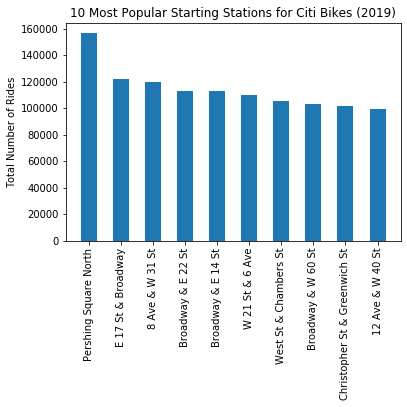

In [22]:
# Plotting Bar Graph based on Top 10 Starting Stations
plt.bar(top_10_start_station["Number of Trips"].index,top_10_start_station["Number of Trips"].values, width = 0.5)
plt.xticks(rotation = 90)
plt.title("10 Most Popular Starting Stations for Citi Bikes (2019)")
plt.ylabel("Total Number of Rides")

Text(0, 0.5, 'Total Number of Rides')

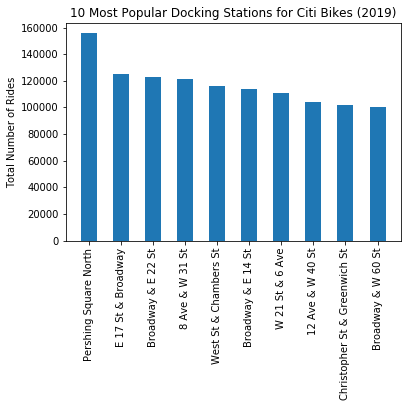

In [23]:
# Plotting Bar Graph based on Top 10 Docking Stations
plt.bar(top_10_end_station["Number of Trips"].index,top_10_end_station["Number of Trips"].values, width = 0.5)
plt.xticks(rotation = 90)
plt.title("10 Most Popular Docking Stations for Citi Bikes (2019)")
plt.ylabel("Total Number of Rides")

In [24]:
# Renaming Index Column for Top 10 Starting Stations
top_10_start_station.rename_axis("Station Name", axis="columns")

Station Name,Number of Trips,Latitude,Longitude
Pershing Square North,156575.0,40.751873,-73.977706
E 17 St & Broadway,121781.0,40.737050,-73.990093
8 Ave & W 31 St,119958.0,40.750585,-73.994685
Broadway & E 22 St,113138.0,40.740343,-73.989551
Broadway & E 14 St,113012.0,40.734546,-73.990741
W 21 St & 6 Ave,110305.0,40.741740,-73.994156
West St & Chambers St,105636.0,40.717548,-74.013221
Broadway & W 60 St,103167.0,40.769155,-73.981918
Christopher St & Greenwich St,101413.0,40.732916,-74.007114
12 Ave & W 40 St,99300.0,40.760875,-74.002777


In [25]:
# Top 10 Start Stations
fig = gmaps.figure(center = (40.75,-74), zoom_level = 12.50)

# Loop for all indexes. Extract Coordinates and Station Name of Each Row from Top 10 Start Stations DataFrame
for index, row in top_10_start_station.iterrows():
    start_locations = top_10_start_station[["Latitude", "Longitude"]]
    start_stations = top_10_start_station.index
    markers = gmaps.marker_layer(start_locations, info_box_content = start_stations)

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
# Top 10 Docking Stations
fig2 = gmaps.figure(center = (40.75,-74), zoom_level = 12.50)

# Loop for all indexes. Extract Coordinates and Station Name of Each Row from Top 10 Start Stations DataFrame
for index, row in top_10_end_station.iterrows():
    end_locations = top_10_end_station[["Latitude", "Longitude"]]
    end_stations = top_10_end_station.index
    markers = gmaps.marker_layer(end_locations, info_box_content = end_stations)

fig2.add_layer(markers)
fig2

Figure(layout=FigureLayout(height='420px'))

In [33]:
# creating an empty list. number of rides for the busiest day of each month will be added to this list
busiest_day_month_rides = []
# creating an empty list. busiest day date of each month will be added to this list
busiest_day_month_dates = []

# creating a function; scans through monthly data frame, reads from each csv file
def busiest_day_months_test(dataframe):
#     splitting starttime values into Dates and Times
    new_start_time = dataframe["starttime"].str.split(" ", n = 1, expand = True)
#     creating a new column for the date (extracted from the split)
    dataframe["Date"] = new_start_time[0]

# Since we are looking for busiest day of the month (based on number of rides), we will groupby Date
    
# groupby newly created date column     
    dates_groupby = dataframe.groupby(["Date"])
# counting number of trips. "tripduration" was just an arbitrary column. any of the other columns would've given the same result  
    dates_groupby_count = dates_groupby["tripduration"].count()
# sorting the rows based on number of rides    
    most_rides_month = dates_groupby_count.sort_values(ascending = False)
    print(most_rides_month.head(1))
# extracting the number of rides from the busiest day (index = 0 because it's the first item in the list)   
    day_rides_count = most_rides_month[0]
# extracting the date from the busiest day (index = 0 because it's the first item in the list)    
    date_print = most_rides_month.index[0]
# appending number of rides and date of busiest day in month to empty lists. will be necessary for plotting    
    busiest_day_month_rides.append(day_rides_count)
    busiest_day_month_dates.append(date_print)

In [34]:
print("Busiest Day for January") 
busiest_day_months_test(jan_19_csv)
print("--------------------------------")
print("Busiest Day for February") 
busiest_day_months_test(feb_19_csv)
print("--------------------------------")
print("Busiest Day for March") 
busiest_day_months_test(mar_19_csv)
print("--------------------------------")

print("Busiest Day for April") 
busiest_day_months_test(april_2019_csv)
print("--------------------------------")
print("Busiest Day for May") 
busiest_day_months_test(may_2019_csv)
print("--------------------------------")
print("Busiest Day for June") 
busiest_day_months_test(june_2019_csv)
print("--------------------------------")

print("Busiest Day for July") 
busiest_day_months_test(july_2019_csv)
print("--------------------------------")
print("Busiest Day for August") 
busiest_day_months_test(august_2019_csv)
print("--------------------------------")
print("Busiest Day for September") 
busiest_day_months_test(september_2019_csv)
print("--------------------------------")

print("Busiest Day for October") 
busiest_day_months_test(october_2019_csv)
print("--------------------------------")
print("Busiest Day for November") 
busiest_day_months_test(november_2019_csv)
print("--------------------------------")
print("Busiest Day for December") 
busiest_day_months_test(december_2019_csv)
print("--------------------------------")


Busiest Day for January
Date
2019-01-09    44338
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for February
Date
2019-02-05    54161
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for March
Date
2019-03-30    66662
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for April
Date
2019-04-24    77723
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for May
Date
2019-05-31    83347
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for June
Date
2019-06-12    85042
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for July
Date
2019-07-24    87644
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for August
Date
2019-08-01    87706
Name: tripduration, dtype: int64
--------------------------------
Busiest Day for September
Date
2019-09-21    98755
Name: tripduration, dtype: int64
----------

Text(0.5, 1.0, 'Busiest Day of Each Month in 2019')

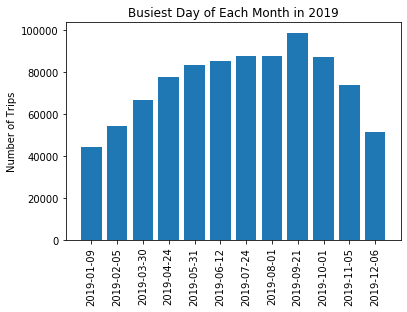

In [36]:
plt.bar(busiest_day_month_dates, height = busiest_day_month_rides)
plt.xticks(rotation=90)
plt.ylabel("Number of Trips")
plt.title("Busiest Day of Each Month in 2019")

In [37]:
# creating an empty list. number of rides for the slowest day of each month will be added to this list
slowest_day_month_rides = []
# creating an empty list. busiest day date of each month will be added to this list
slowest_day_month_dates = []

# creating a function; scans through monthly data frame, reads from each csv file
def slowest_day_months_test(dataframe):
#     splitting starttime values into Dates and Times
    new_start_time = dataframe["starttime"].str.split(" ", n = 1, expand = True)
#     creating a new column for the date (extracted from the split)
    dataframe["Date"] = new_start_time[0]

# Since we are looking for busiest day of the month (based on number of rides), we will groupby Date
    
# groupby newly created date column     
    dates_groupby = dataframe.groupby(["Date"])
# counting number of trips. "tripduration" was just an arbitrary column. any of the other columns would've given the same result  
    dates_groupby_count = dates_groupby["tripduration"].count()
# sorting the rows based on number of rides    
    least_rides_month = dates_groupby_count.sort_values(ascending = True)
    print(least_rides_month.head(1))
# extracting the number of rides from the busiest day (index = 0 because it's the first item in the list)   
    day_rides_count = least_rides_month[0]
# extracting the date from the busiest day (index = 0 because it's the first item in the list)    
    date_print = least_rides_month.index[0]
# appending number of rides and date of busiest day in month to empty lists. will be necessary for plotting    
    slowest_day_month_rides.append(day_rides_count)
    slowest_day_month_dates.append(date_print)

In [38]:
print("Slowest Day for January") 
slowest_day_months_test(jan_19_csv)
print("--------------------------------")
print("Slowest Day for February") 
slowest_day_months_test(feb_19_csv)
print("--------------------------------")
print("Slowest Day for March") 
slowest_day_months_test(mar_19_csv)
print("--------------------------------")

print("Slowest Day for April") 
slowest_day_months_test(april_2019_csv)
print("--------------------------------")
print("Slowest Day for May") 
slowest_day_months_test(may_2019_csv)
print("--------------------------------")
print("Slowest Day for June") 
slowest_day_months_test(june_2019_csv)
print("--------------------------------")

print("Slowest Day for July") 
slowest_day_months_test(july_2019_csv)
print("--------------------------------")
print("Slowest Day for August") 
slowest_day_months_test(august_2019_csv)
print("--------------------------------")
print("Slowest Day for September") 
slowest_day_months_test(september_2019_csv)
print("--------------------------------")

print("Slowest Day for October") 
slowest_day_months_test(october_2019_csv)
print("--------------------------------")
print("Slowest Day for November") 
slowest_day_months_test(november_2019_csv)
print("--------------------------------")
print("Slowest Day for December") 
slowest_day_months_test(december_2019_csv)
print("--------------------------------")

Slowest Day for January
Date
2019-01-21    10291
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for February
Date
2019-02-12    15854
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for March
Date
2019-03-02    18001
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for April
Date
2019-04-05    34459
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for May
Date
2019-05-12    10729
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for June
Date
2019-06-18    36402
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for July
Date
2019-07-21    48198
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for August
Date
2019-08-07    52193
Name: tripduration, dtype: int64
--------------------------------
Slowest Day for September
Date
2019-09-02    37792
Name: tripduration, dtype: int64
----------

Text(0.5, 1.0, 'Slowest Day of Each Month in 2019')

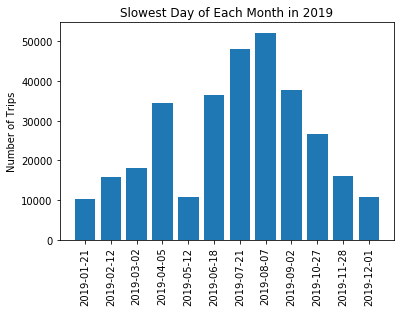

In [39]:
plt.bar(slowest_day_month_dates, height = slowest_day_month_rides)
plt.xticks(rotation=90)
plt.ylabel("Number of Trips")
plt.title("Slowest Day of Each Month in 2019")

In [40]:
slowest_days_df = pd.DataFrame(slowest_day_month_dates)
slowest_days_df["Number of Rides"]= slowest_day_month_rides
slowest_days_df.rename(columns = {0:"Date"}, inplace = True)

In [41]:
busiest_days_df = pd.DataFrame(busiest_day_month_dates)
busiest_days_df["Number of Rides"]= busiest_day_month_rides
busiest_days_df.rename(columns = {0:"Date"}, inplace = True)

In [42]:
busiest_day_temp = ["42.48","50.33","54.63","63.43","70.46","67.38","76.5","80.21","73.46","72.7","56.68","42.5"]
busiest_day_precip = ["0.21", "0", "0", "0.11","0.80","0","0.02","0.58","0","0","0","0"]
busiest_weekday = ["Wednesday", "Tuesday", "Saturday", "Friday","Friday","Wednesday","Wednesday","Thursday","Saturday","Tuesday","Tuesday","Friday"]


busiest_days_df["Average Temperature in F"] = busiest_day_temp
busiest_days_df["Average Precipitation in Inches"] = busiest_day_precip
busiest_days_df["Day of The Week"] = busiest_weekday
busiest_days_df

,Date,Number of Rides,Average Temperature in F,Average Precipitation in Inches,Day of The Week
0,2019-01-09,44338,42.48,0.21,Wednesday
1,2019-02-05,54161,50.33,0,Tuesday
2,2019-03-30,66662,54.63,0,Saturday
3,2019-04-24,77723,63.43,0.11,Friday
4,2019-05-31,83347,70.46,0.80,Friday
5,2019-06-12,85042,67.38,0,Wednesday
6,2019-07-24,87644,76.5,0.02,Wednesday
7,2019-08-01,87706,80.21,0.58,Thursday
8,2019-09-21,98755,73.46,0,Saturday
9,2019-10-01,87033,72.7,0,Tuesday


In [43]:
slowest_day_temp = ["11.58","30.51","34.6","39.76","49","70.22","91.12","77.19","73.79","61.74","46.46","35.17"]
slowest_day_precip = ["0.20","0","0.41","0","0.42","0.10","0","0","0","0.03","0.02","0"]
slowest_weekday = ["Monday","Tuesday","Saturday","Sunday","Sunday","Tuesday","Sunday","Wednesday","Monday","Sunday","Thursday","Sunday"]

slowest_days_df["Average Temperature in F"] = slowest_day_temp
slowest_days_df["Average Precipitation in Inches"] = slowest_day_precip
slowest_days_df["Day of The Week"] = slowest_weekday
slowest_days_df

,Date,Number of Rides,Average Temperature in F,Average Precipitation in Inches,Day of The Week
0,2019-01-21,10291,11.58,0.20,Monday
1,2019-02-12,15854,30.51,0,Tuesday
2,2019-03-02,18001,34.6,0.41,Saturday
3,2019-04-05,34459,39.76,0,Sunday
4,2019-05-12,10729,49,0.42,Sunday
5,2019-06-18,36402,70.22,0.10,Tuesday
6,2019-07-21,48198,91.12,0,Sunday
7,2019-08-07,52193,77.19,0,Wednesday
8,2019-09-02,37792,73.79,0,Monday
9,2019-10-27,26758,61.74,0.03,Sunday


In [48]:
# Finding the most reocurring busiest day of the week. 

busiest_day_of_week = max(set(busiest_weekday), key=busiest_weekday.count)
print(f'The most common weekday amongst Busiest days of the month is {busiest_day_of_week}')

# Finding the most reocurring slowest day of the week. 
slowest_day_of_week = max(set(slowest_weekday), key=slowest_weekday.count)
print(f'The most common weekday amongst Slowest days of the month is {slowest_day_of_week}')

The most common weekday amongst Busiest days of the month is Friday
The most common weekday amongst Slowest days of the month is Sunday


In [55]:
jan_19_csv.dropna(axis=0,how="any", inplace = True)
jan_19_csv["tripduration"].count()

967269

In [71]:
rides_per_month = []
def monthly_rides(dataframe):
    dataframe.dropna(axis=0,how="any", inplace = True)
    monthly_rides_count = dataframe["tripduration"].count()
    print(monthly_rides_count)
    rides_per_month.append(monthly_rides_count)    

In [72]:
print("Number of Rides in January")
monthly_rides(jan_19_csv)
print("---------------------------")

print("Number of Rides in February")
monthly_rides(feb_19_csv)
print("---------------------------")

print("Number of Rides in March")
monthly_rides(mar_19_csv)
print("---------------------------")

print("Number of Rides in April")
monthly_rides(april_2019_csv)
print("---------------------------")

print("Number of Rides in May")
monthly_rides(may_2019_csv)
print("---------------------------")

print("Number of Rides in June")
monthly_rides(june_2019_csv)
print("---------------------------")

print("Number of Rides in July")
monthly_rides(july_2019_csv)
print("---------------------------")

print("Number of Rides in August")
monthly_rides(august_2019_csv)
print("---------------------------")

print("Number of Rides in September")
monthly_rides(september_2019_csv)
print("---------------------------")

print("Number of Rides in October")
monthly_rides(october_2019_csv)
print("---------------------------")

print("Number of Rides in November")
monthly_rides(november_2019_csv)
print("---------------------------")

print("Number of Rides in December")
monthly_rides(december_2019_csv)
print("---------------------------")

rides_per_month

Number of Rides in January
967269
---------------------------
Number of Rides in February
943735
---------------------------
Number of Rides in March
1327950
---------------------------
Number of Rides in April
1766094
---------------------------
Number of Rides in May
1924563
---------------------------
Number of Rides in June
2125370
---------------------------
Number of Rides in July
2181010
---------------------------
Number of Rides in August
2344135
---------------------------
Number of Rides in September
2444900
---------------------------
Number of Rides in October
2092573
---------------------------
Number of Rides in November
1478708
---------------------------
Number of Rides in December
955210
---------------------------


[967269,
 943735,
 1327950,
 1766094,
 1924563,
 2125370,
 2181010,
 2344135,
 2444900,
 2092573,
 1478708,
 955210]

Text(0.5, 1.0, 'Trips per Month in 2019')

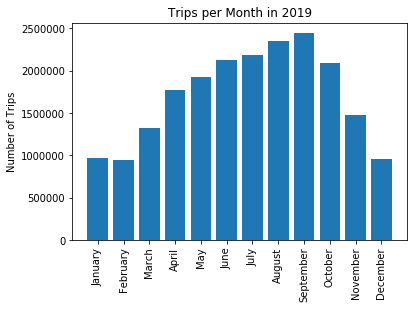

In [78]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

plt.bar(months, height = rides_per_month)
plt.xticks(rotation=90)
plt.ylabel("Number of Trips")
plt.title("Trips per Month in 2019")